<h1><center>Corn Yields and Sustainable Growing Methods</center></h1>

Author: Evan Kennedy

## **Introduction**

Food production is one of humanity's most essential enterprises, more essential than even the booming energy sector. Unfortunately, much like the energy sector, in recent decades the unsustainability of common agricultural practices has become an apparent concern. In particular, issues of nutrient runoff from fields into waterways, and degradation of soil from abusive overcropping have become issues of particular scrutiny for their harm to the environment and to the long-term viability of the agircultural sector itself. The good news for agriculture is that rather than in the energy sector, producers are also concerned about these impacts. Runoff of nutrients loses farmers money on chemical inputs that do nothing to help their crops while in a river, and degrading soil poses a risk to the long-term productivity of a farmer's land.

Even better news is that there are many methods already widely posed for mitigating the impact of agriculture, including practices like no-till to mitigate runoff and nutrient loss, crop rotations to avoid over-exploiting particular chemical levels in soil by changing the crops' chemical demand between cycles, and cover crops to prevent runoff of soil when a field's main crops are not being grown. However, despite both their established effectiveness and the demand for sustainable practices, adoption of these techniques and others like them remains slow. This is because farms are fundamentally businesses, that need to protect their bottom line to operate. New techniques can be costly to adopt, and farmers often worry over the long-term effect of altered growing techniques on yields.

The objective of this project is to investigate how some of these sustainable practices impact yields for one of the world's staple crops, corn, to try and establish a more definite answer for how much farmers should worry over yield losses when considering adoption of these sustainable practices. We will do this by modeling corn yield data with growing practices as factors, to determine the relationship between yields and practice.

**Hypothesis: Growing practices related to sustainability have little effect on corn yields.**

**Note: The following project has been created as both an investigation and beginner data science tutorial. Feel free to follow along with the steps and create your own project, or use the process to do similar analysis on different data.**

Library imports used in this project

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn import linear_model

## **Data Collection**

For this project, we are first off going to need a data set to work with. While your initial instinct may be to use a large sample of yield data from actual farms and compare their practices, such a dataset is very difficult to find, as farms, like any other business, prefer to keep the finer details of their practices and productivity private. Thus we will settle for the next best thing; study data intentionally giving corn fields different treatments of growing practices.

Data is from a National Laboratory for Agriculture and Environment study analyzing individual controlled corn growing plots via the Iowa State University from 2007-2021, using different combinations of tilling methods, crop rotations, growing methods, and silage treatments. 

**Link to the data:**
https://catalog.data.gov/dataset/thirteen-year-stover-harvest-and-tillage-effects-on-corn-agroecosystem-sustainability-in-i-be5ae

The files from the study used in this project are 'Field 70-71 CornYield_2008-2021_ForR_0.csv' for field treatment and yields data, 'PRISM_MayTemps.csv' for annual season temperature data, and 'Rainfall_AEA.csv' for daily rainfall data.

## **Data Processing**

Before we can begin graphing and modelling our data to find trends, we need to change it to a more usable form. In this case, that means streamlining our columns down to easily referenced variables, and seperating our data by year in addition to plot number, to make distinct rows of feature values that we can easily reference later.

### *Importing the data*

To begin working with the data, we need to put it into pandas dataframes in our notebook. To do this, we will be using the pandas library read_csv function to easily get dataframes containing the data in the csv files. Ensure the csv files metioned above are in the same folder as your notebook for them to be easily read as they have been in the example code.

In [36]:
#Making 3 dataframes for the three csv files we want information from
field_file_loc = "Field 70-71 CornYield_2008-2021_ForR_0.csv"
field_data = pd.read_csv(field_file_loc)

temp_file_loc = "PRISM_MayTemps.csv"
temp_data = pd.read_csv(temp_file_loc)

rain_file_loc = "Rainfall_AEA.csv"
rain_data = pd.read_csv(rain_file_loc)

If we have done the previous step correctly, then we should be able to print our dataframes and view the data from the csv files in a more readable table form.

In [37]:
#Viewing field_data
print(field_data)

    PlotNo  Field  Block  Treatment LevelStoverHarvest  Tillage  \
0      115     71      1          1                NaN   Chisel   
1      208     71      2          1                NaN   Chisel   
2      322     70      3          1                NaN   Chisel   
3      420     70      4          1                NaN   Chisel   
4      106     71      1          2                NaN  No-till   
..     ...    ...    ...        ...                ...      ...   
83     412     70      4         21           Moderate  No-till   
84     111     71      1         22               High  No-till   
85     222     71      2         22               High  No-till   
86     303     70      3         22               High  No-till   
87     417     70      4         22               High  No-till   

             InitialCroppingSystem                 EndingCropRotation  \
0                  Continuous Corn                    Continuous Corn   
1                  Continuous Corn               

In [38]:
#Viewing temp_data
print(temp_data)

    Year  May.tmin.C  May.tmean.C  May.tmax.C
0   2008         8.1         14.5        20.8
1   2009         9.9         15.7        21.5
2   2010         9.6         15.6        21.7
3   2011         9.1         15.2        21.2
4   2012        12.2         19.1        25.9
5   2013         9.8         15.2        20.6
6   2014        10.0         15.9        21.8
7   2015        10.6         15.7        20.9
8   2016         9.8         15.6        21.4
9   2017         9.5         15.3        21.2
10  2018        14.0         20.0        26.1
11  2019         8.6         14.0        19.5
12  2020         9.8         14.7        19.6
13  2021        10.2         15.5        20.8


In [39]:
#Viewing rain_data
print(rain_data)

           Date  DOY  Month  Year  Inches      mm
0      1/1/2008    1      1  2008    0.00   0.000
1      1/2/2008    2      1  2008    0.00   0.000
2      1/3/2008    3      1  2008    0.00   0.000
3      1/4/2008    4      1  2008    0.00   0.000
4      1/5/2008    5      1  2008    0.03   0.762
...         ...  ...    ...   ...     ...     ...
5342  8/17/2022  229      8  2022    0.00   0.000
5343  8/18/2022  230      8  2022    0.01   0.254
5344  8/19/2022  231      8  2022    0.43  10.922
5345  8/20/2022  232      8  2022    0.02   0.508
5346  8/21/2022  233      8  2022    0.00   0.000

[5347 rows x 6 columns]


### *Rainfall Data*

Now that we have the data in our notebook, we need to do some processing before we get to any analysis or model building. We'll start with the rainfall data. Looking at the data we have, the rainfall data is daily rainfall, but all our other data is yearly. To fix that we'll be combining the rainfall data from April-October for 2008-2020 into season totals, to align with the yields data we have.

Knowledgable readers may note that corn is often planted in mid or late April (if not in early May) and harvested in early or mid October, so including all the rainfall data from those months could be excessive. However, we do not have information from our dataset on the exact date that any plots were planted or harvested, so we include the entire month's data to be thorough.

To accomplish this we will be making a new rainfall data dataframe with a only a Year and Rainfall column, then summing the desired values for each year to find the values to add into the new dataframe. The values added to the new dataframe will be the millimeter values in this case, although the inch values could also be used.

In [40]:
#Making new rainfall dataframe
rain_columns = ['Year', 'Rainfall']
season_rain_data = pd.DataFrame(columns=rain_columns)

#Getting seasonal sums
temp_season_rain = {}#temp variable for summed season rainfall values
for index, row in rain_data.iterrows():
    if (2008 <= row['Year'] & row['Year'] <= 2020) & (4 <= row['Month'] & row['Month'] <= 10):
        #Adding year to dictionary of sums if not already there
        if (row['Year'] in temp_season_rain.keys()) == False:
            temp_season_rain[row['Year']] = row['mm']
        #Adding to existing sum for the year
        else:
            temp_season_rain[row['Year']] = temp_season_rain[row['Year']] + row['mm']

#Putting summed information into new dataframe
for year in temp_season_rain.keys():
    season_rain_data.loc[season_rain_data.shape[0]] = [year, temp_season_rain[year]]

If we have done the previous step correctly, we should now be able to print season_rain_data and see yearly seasonal rainfall data (in mm)

In [41]:
#Viewing season_rain_data
print(season_rain_data)

      Year  Rainfall
0   2008.0   789.178
1   2009.0   564.388
2   2010.0   824.230
3   2011.0   443.738
4   2012.0   402.590
5   2013.0   597.408
6   2014.0   978.154
7   2015.0   950.214
8   2016.0   762.762
9   2017.0   617.982
10  2018.0   948.436
11  2019.0   738.124
12  2020.0   391.668


### *Field Data*

Now we need to process the plot management and yields data. For basic processing of this data we will:
 - Seperate biochar application out from the EndingCropRotation column to make biochar application be a measurable value 
 - Adjust the InitialCroppingSystem column to include just "Continuous", "Twin", and "Cover" as options, as there is no difference between perennial cover crops and annual cover crops for yields, with that distinction existing in this data for soil health analyses, not corn yields
 - Drop the EndingCropRotation column once biochar data has been extracted from it, as the general rotation used in the field is captured by EndingCroppingSystem (Corn Alfalfa for 3 alfalfa 2 corn rotation, Corn for continuous corn, Cover Crop for Rye Soy Wheat/Cover Corn rotation)
 - Drop the Treatment column because we are not using the data it contains
 - Drop the StoverHarvest columns because we are not analyzing that data in this project
 - Rename the InitialCroppingSystem column to System and the EndingCroppingSystem column to Rotation for ease of reference and clarity
 - Change the NaN values in the LevelStoverHarvest column to None, reresenting what those values actually indicate.

To seperate biochar into its own column, we will be adding a biochar column initially filled with 0s. We will then find the rows in the dataframe with biochar application, based on the EndingCropRotation column, and use the number in those descriptions as those rows' biochar level. To identify the rows with biochar application and the number for biochar application, we will be using the 'in' operator to check for substrings "biochar", "4" and "13" in the EndingCropRotation column. (This works because there were only two specific levels of biochar application done for this study)

Important: We check against the lowercase version of the EndingCropRotation value for a row using the .lower() method to make matching easier

In [42]:
#Adding a biochar column
field_data['Biochar'] = 0

#Updating values for biochar column
for index, row in field_data.iterrows():
    if ('biochar' in row['EndingCropRotation'].lower()) & ('4' in row['EndingCropRotation'].lower()):
        field_data.loc[index, 'Biochar'] = 4
    elif ('biochar' in row['EndingCropRotation'].lower()) & ('13' in row['EndingCropRotation'].lower()):
        field_data.loc[index, 'Biochar'] = 13

If the above step was done correctly, you should be able to print out the rows where the biochar column has the value 4 or 13 and get the rows with the appopriate values in the EndingCropRotation column

In [43]:
#Viewing 'EndingCropRotation' and 'biochar' columns of rows with non-zero biochar application
print(field_data.loc[field_data['Biochar'].isin([4,13])].loc[:, ['EndingCropRotation', 'Biochar']])

                        EndingCropRotation  Biochar
48   Continuous Corn with 4 t/acre BioChar        4
49   Continuous Corn with 4 t/acre BioChar        4
50   Continuous Corn with 4 t/acre BioChar        4
51   Continuous Corn with 4 t/acre BioChar        4
52  Continuous Corn with 13 t/acre BioChar       13
53  Continuous Corn with 13 t/acre BioChar       13
54  Continuous Corn with 13 t/acre BioChar       13
55  Continuous Corn with 13 t/acre BioChar       13
56   Continuous Corn with 4 t/acre BioChar        4
57   Continuous Corn with 4 t/acre BioChar        4
58   Continuous Corn with 4 t/acre BioChar        4
59   Continuous Corn with 4 t/acre BioChar        4
60  Continuous Corn with 13 t/acre BioChar       13
61  Continuous Corn with 13 t/acre BioChar       13
62  Continuous Corn with 13 t/acre BioChar       13
63  Continuous Corn with 13 t/acre BioChar       13
64   Continuous Corn with 4 t/acre BioChar        4
65   Continuous Corn with 4 t/acre BioChar        4
66   Continu

To adjust the InitialCroppingSystem strings we will again just be using a substring approach, matching to "continuous" for continuous, "twin" for twin-row and "cover" for cover crops (perennial and annual)

Important: We again check against the lowercase version of the EndingCropRotation value for a row using the .lower() method to make matching easier

In [44]:
#Adjusting InitialCroppingSystem values
for index, row in field_data.iterrows():
    if "continuous" in row['InitialCroppingSystem'].lower():
        field_data.loc[index, 'InitialCroppingSystem'] = "Continuous"
    elif "twin" in row['InitialCroppingSystem'].lower():
        field_data.loc[index, 'InitialCroppingSystem'] = "Twin"
    elif "cover" in row['InitialCroppingSystem'].lower():
        field_data.loc[index, 'InitialCroppingSystem'] = "Cover"

If the above step was done correctly you should be able to print the unique items in InitialCroppingSystem column using pd.unique(df) and get back only our three desired labels

In [45]:
#Viewing InitialCroppingSystem column
print(pd.unique(field_data.loc[:, 'InitialCroppingSystem']))

['Continuous' 'Twin' 'Cover']


To drop the EndingCropRotation and Treatment columns we simply use the .drop() function of a pandas dataframe, making sure that we do so with inplace=True

In [46]:
#Dropping EndingCropRotation and Treatment column
field_data.drop(columns=['EndingCropRotation', 'Treatment'], inplace=True)

We repeat the same method for dropping the Stover Harvest data

In [47]:
#Getting list of Stover Harvest data columns to drop
drop = []
for i in range(2008,2021):
    drop = drop + ["Stover" + str(i)]

#Dropping Stover Harvest columns
field_data.drop(columns=drop, inplace=True)

To rename the InitialCroppingSystem and EndingCroppingSystem columns we will be using the .rename() function of a pandas dataframe, making sure that we do so with inplace=True

In [48]:
#Renaming InitialCroppingSystem and EndingCroppingSystem columns
field_data.rename(columns={'InitialCroppingSystem': 'System', 'EndingCroppingSystem': 'Rotation'}, inplace=True)

To replace the NaN values in the LevelStoverHarvest column we will be using the .fillna() function of a pandas dataframe, making sure we do so with inplace=True

In [ ]:
#Replacing NaN in LevelStoverHarvest column with None
field_data.loc[:, 'LevelStoverHarvest'].fillna("None", inplace=True)

Now we can print field_data and see that we are just left with the data that was in field_data initially that we would want to use to predict corn yields, along with the corn yield data and plot identifying information. 

In [50]:
#Viewing field_data
print(field_data)

    PlotNo  Field  Block LevelStoverHarvest  Tillage      System  \
0      115     71      1               None   Chisel  Continuous   
1      208     71      2               None   Chisel  Continuous   
2      322     70      3               None   Chisel  Continuous   
3      420     70      4               None   Chisel  Continuous   
4      106     71      1               None  No-till  Continuous   
..     ...    ...    ...                ...      ...         ...   
83     412     70      4           Moderate  No-till       Cover   
84     111     71      1               High  No-till       Cover   
85     222     71      2               High  No-till       Cover   
86     303     70      3               High  No-till       Cover   
87     417     70      4               High  No-till       Cover   

           Rotation Crop2017  Grain2008  Grain2009  ...  Grain2012  Grain2013  \
0   Continuous Corn     Corn      186.2      144.3  ...      121.4      142.7   
1   Continuous Corn  

### *Time-Bounding*

Now the most important piece of processing for field data, splitting between years. For this analysis, we want to treat every plot/year combination as its own data point, so we will be splitting the rows of field_data into multiple rows based on year.

To do this we will be making a new dataframe crop_data with each row being a unique year/plot combination. This dataframe will also hold rainfall and temperature information, as these are relevant factors for corn yields. To accomplish this we will:
 - Create rows in crop_data from the rows of field_data, for every year for which there is grain yield data. (Years without grain yield data are years where other crops were being grown as part of crop rotations)
 - Add rain and temperature data corresponding to year for each row in crop_data, taken from our other dataframes temp_data and season_rain-data
 - Set biochar application level to 0 for all non-2013 years, as biochar application in the study was only performed once in 2013

To split the field_data rows into multiple rows for crop_data, we will iterate through the field_data rows, and for each row check each year for which yield data can exist (ie. value is not NaN, checked using np.isnan()). If yield data does exist for the year we check, we then add that year's yield data along with all other non-yield data in the row into crop_data as a new row. We add a new row by assigning a list containing the values for our new row to the index one beyond the largest existing index for our dataframe (found using df.shape[0]).

In [51]:
#Creating new dataframe for field data seperated by row
crop_columns = ['PlotNo', 'Field', 'Block', 'LevelStoverHarvest', 'Tillage', 'System', 'Rotation', 'Year',\
                 'Yield', 'Biochar']
crop_data = pd.DataFrame(columns=crop_columns)
for index, row in field_data.iterrows():
    for year in range(2008, 2021):
        if np.isnan(row["Grain" + str(year)]) == False:
            crop_data.loc[crop_data.shape[0]] = [row['PlotNo'], row['Field'], row['Block'],\
                                                row['LevelStoverHarvest'], row['Tillage'],\
                                                row['System'], row['Rotation'], year,\
                                                row["Grain" + str(year)], row['Biochar']]

To add the rainfall and temperature data to our year sorted crop data, we can add two columns for Rainfall, HighTemp, LowTemp, MeanTemp initialized to zero, then replace those values with the corresponding values from the rain and temp dataframes row-by-row, based on the year value.

We can get the value corresponding to a specific year from the rain and temp dataframes by using df.loc[df['column_name'] == target_value], which will give us all rows for which the value in column column_name is our target_value. For our rain and temp dataframes, there is only one row for every year, so we can then easily get the Rainfall/Temp column value from the year's row.

In [52]:
#Creating columns for rainfall and temp
crop_data['Rainfall'] = 0.0
crop_data['HighTemp'] = 0.0
crop_data['LowTemp'] = 0.0
crop_data['MeanTemp'] = 0.0

#Adding rainfall and temp data
for index, row in crop_data.iterrows():
    rainfall = season_rain_data.loc[season_rain_data['Year'] == row['Year']].loc[:,'Rainfall'].item()
    crop_data.loc[index, 'Rainfall'] = rainfall

    high_temp = temp_data.loc[temp_data['Year'] == row['Year']]['May.tmax.C'].item()
    crop_data.loc[index, 'HighTemp'] = high_temp

    low_temp = temp_data.loc[temp_data['Year'] == row['Year']]['May.tmin.C'].item()
    crop_data.loc[index, 'LowTemp'] = low_temp

    avg_temp = temp_data.loc[temp_data['Year'] == row['Year']]['May.tmean.C'].item()
    crop_data.loc[index, 'MeanTemp'] = avg_temp


Setting the biochar levels for non-2013 years is easy, it just requires us to go through the dataframe rows and change the value in the Biochar column to 0 if the Year column is not 2013.

In [53]:
#Removing biochar application from non-2013 years
for index, row in crop_data.iterrows():
    if row['Year'] != 2013:
        crop_data.loc[index, 'Biochar'] = 0

Assuming all previous steps have been completed correctly, we should now be able to print our dataframe and see it completed with all the data we want to have (plot number, field, block, stover harvest level, till method, growing system, crop rotation, biochar application, rainfall, high temperature, low temperature, mean temperature) with each plot/year combination being its own row.

In [54]:
#Viewing fully processed dataframe
print(crop_data)

     PlotNo  Field  Block LevelStoverHarvest  Tillage      System  \
0       115     71      1               None   Chisel  Continuous   
1       115     71      1               None   Chisel  Continuous   
2       115     71      1               None   Chisel  Continuous   
3       115     71      1               None   Chisel  Continuous   
4       115     71      1               None   Chisel  Continuous   
..      ...    ...    ...                ...      ...         ...   
931     417     70      4               High  No-till       Cover   
932     417     70      4               High  No-till       Cover   
933     417     70      4               High  No-till       Cover   
934     417     70      4               High  No-till       Cover   
935     417     70      4               High  No-till       Cover   

            Rotation  Year  Yield  Biochar  Rainfall  HighTemp  LowTemp  \
0    Continuous Corn  2008  186.2        0   789.178      20.8      8.1   
1    Continuous Corn 

That should do it for our data processing. Luckily for this data set we did not have to handle any missing values, owing to the small-scale, non-survey nature of the field data we are using. If processing a similar dataset that does have missing values, missing yield values could be replaced with yield values for the same plot from different years, with priority given to years either with the most similar conditions (determined by using distance metrics) or that were the closest in date, depending on the dataset.

## **Exploratory Analysis**

Now that our data is processed into a nicer form, we can start looking for trends in the data. To start, we will be graphing the data and looking for trends in those graphs, to inform how we want to approach modelling our data.

### *Continuous Values*

Now that we have our data processed into a usable form, we want to do some basic analysis of it to notice some patterns. To accomplish this, we will be first be plotting corn yields against our continuous values including time, temperature, rainfall, and biochar. 

The plots that we will use for this graphing will be violin plots, as even for our continuous values the values are still sparse, as we only have unique temp/rainfall/year values for each year. Violin plots are useful because they allow use to see the distribution of points with the same x-axis value, something very difficult to see with densely packed data in a scatter plot.

To create our plots, we will use seaborn's violinplot functionality.

For biochar application, we will only graph continuous corn plots in 2013 because biochar was only applied to continuous corn fields in 2013. We will get just the continuous corn plot data using the same method we used above to get rainfall and temperature data based on the value of the year column in a row, but now using the value of the Rotation column as the indicator for if to use the row.

**Documentation for Seaborn Violinplots:** https://seaborn.pydata.org/generated/seaborn.violinplot.html

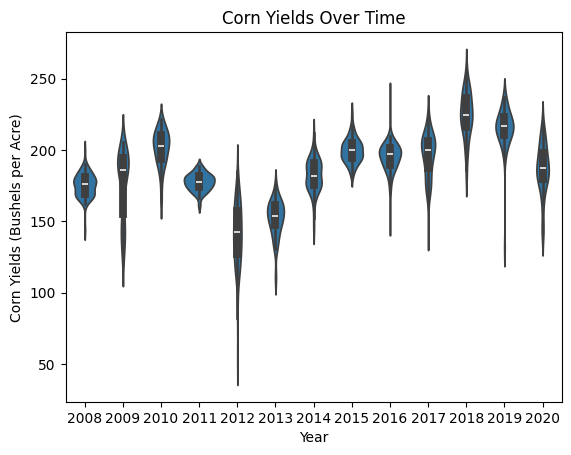

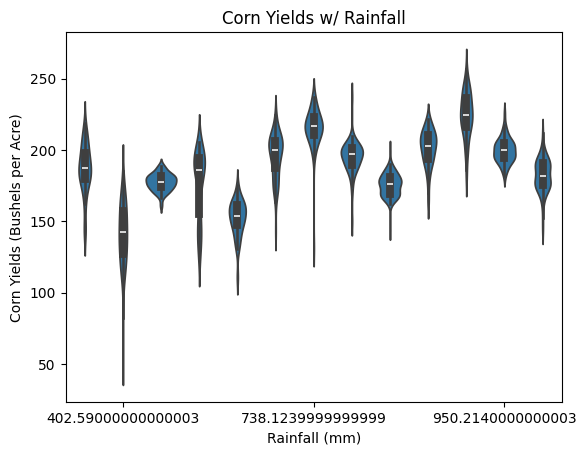

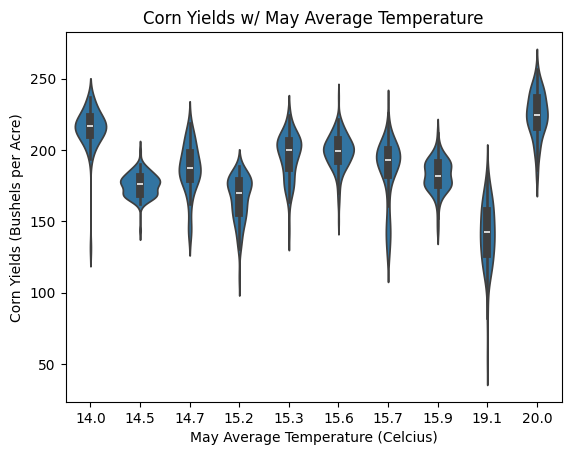

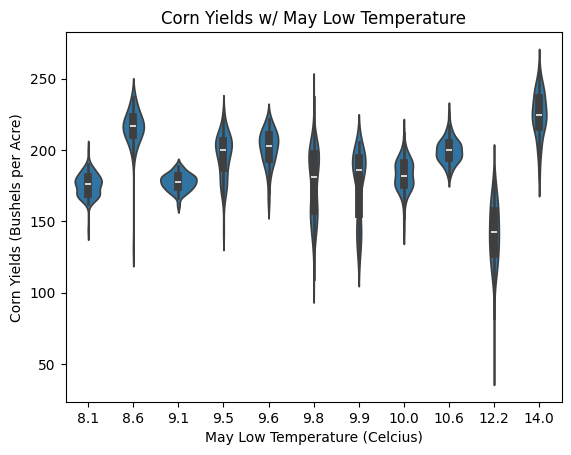

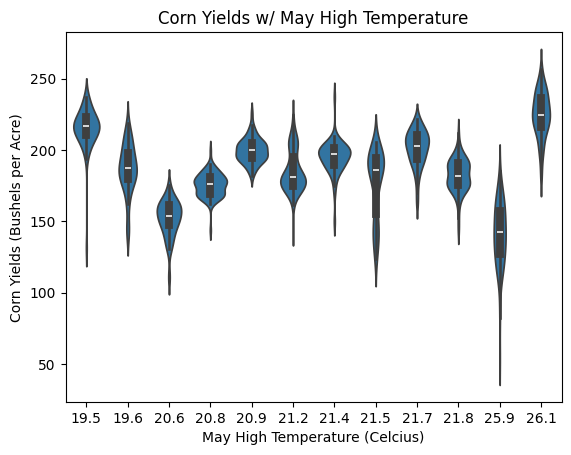

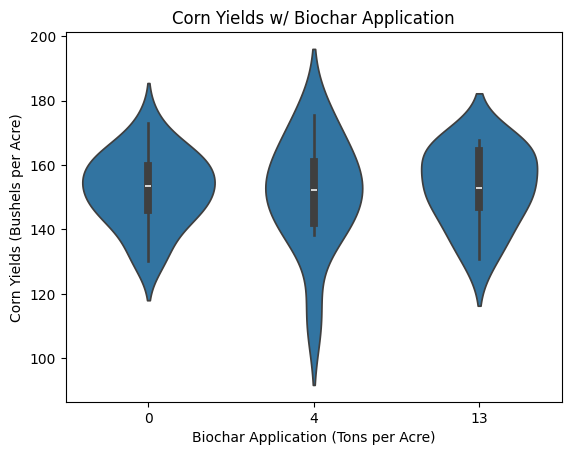

In [55]:
#Violin plotting Yields over Time
year_plot = sns.violinplot(data=crop_data, x="Year", y="Yield")
year_plot.set(xlabel ="Year", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields Over Time")
plt.show()

#Violin plotting Yields against Rainfall
rainfall_plot = sns.violinplot(data=crop_data, x="Rainfall", y="Yield")
rainfall_plot.set(xlabel ="Rainfall (mm)", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ Rainfall")
rainfall_plot.set_xticks(range(1,15,5))
plt.show()


#Violin plotting Yields against Mean Temperature
mean_temp_plot = sns.violinplot(data=crop_data, x="MeanTemp", y="Yield")
mean_temp_plot.set(xlabel ="May Average Temperature (Celcius)", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ May Average Temperature")
plt.show()

#Violin plotting Yields against Low Temperature
low_temp_plot = sns.violinplot(data=crop_data, x="LowTemp", y="Yield")
low_temp_plot.set(xlabel ="May Low Temperature (Celcius)", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ May Low Temperature")
plt.show()

#Violin plotting Yields against High Temperature
high_temp_plot = sns.violinplot(data=crop_data, x="HighTemp", y="Yield")
high_temp_plot.set(xlabel ="May High Temperature (Celcius)", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ May High Temperature")
plt.show()

#Violin plotting Yields against Biochar Application
biochar_plot = sns.violinplot(data=crop_data.loc[crop_data['Rotation']=='Continuous Corn'].loc[crop_data['Year']==2013], 
                            x="Biochar", y="Yield")
biochar_plot.set(xlabel = "Biochar Application (Tons per Acre)", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ Biochar Application")
plt.show()

Looking at our graphs for yields plotted against continuous values, we see a bit of an upward trend in yields with rainfall, as one would expect, but otherwise see little clear relationship with temperature, assumedly owing to the relatively low size of the temperature sample size, and to that no particularly cold season starts were recorded, the main factor that could cause temperature to become a significant factor for corn growth. For biochar, we see little difference in yield with greater biochar application, likely because fertilizer is applied to the fields as needed regardless of biochar application, although unfortunately data on fertilizer appliation is not available for the study we are working with.

The lack of yield trend over time is in-line with the study we are working with, which treated each plot similarly over the course of the study.

### *Categorical Values*

We will now be looking at the effect of categorical values on yields, again using violin plots. The categorical values of interest for us are tilling method, crop rotation, growing system and stover harvest level, which we will use as the x-values for our plots, this time forgoing the data parameter of sns.violinplot() and just directly feeding in the columns we want to use for the x and y values.


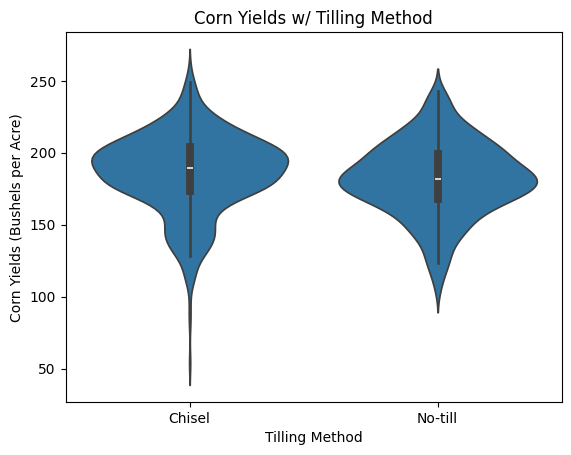

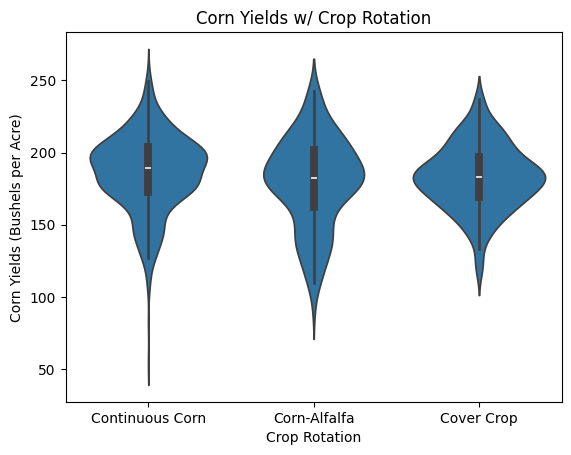

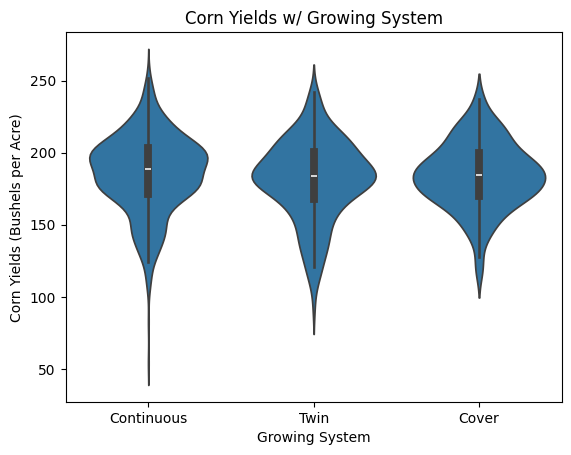

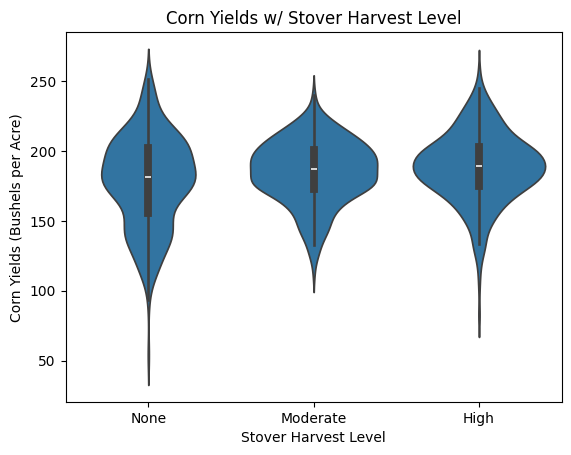

In [56]:
#Violin plotting Yields with Tilling Method
year_plot = sns.violinplot(x=crop_data.loc[:, 'Tillage'], y=crop_data.loc[:, 'Yield'])
year_plot.set(xlabel ="Tilling Method", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ Tilling Method")
plt.show()

#Violin plotting Yields with Crop Rotation
year_plot = sns.violinplot(x=crop_data.loc[:, 'Rotation'], y=crop_data.loc[:, 'Yield'])
year_plot.set(xlabel ="Crop Rotation", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ Crop Rotation")
plt.show()

#Violin plotting Yields with Growing System
year_plot = sns.violinplot(x=crop_data.loc[:, 'System'], y=crop_data.loc[:, 'Yield'])
year_plot.set(xlabel ="Growing System", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ Growing System")
plt.show()

#Violin plotting Yields with Stover Harvest Level
year_plot = sns.violinplot(x=crop_data.loc[:, 'LevelStoverHarvest'], y=crop_data.loc[:, 'Yield'])
year_plot.set(xlabel ="Stover Harvest Level", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Corn Yields w/ Stover Harvest Level")
plt.show()

Looking at our graphs for categorical values, we see little difference in yield distributions for different practices. This lack of a trend would be within itself informative, and we will now move onto building a model to determine more definitively if the trends we have seen in our exploratory analysis will hold true.

## **Modelling**

For this project, we will be building a polynomial regression model to predict corn yields given information on the climatic conditions and the growing practices used. Essentially, fitting a polynomial regression to a dataset is creating a polynomial function that takes in input values to predict an output value, and fitting that function to data we have for our chosen set of inputs and outputs.

**Additional Resource on Polynomial Regression**: https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18

### *Choosing Inputs*

Our first step will be to identify what input values we want to use. So far we have analyzed the relationship of corn yields to mean temperature, low temperature, high temperature, seasonal rainfall, biochar application, tilling method, crop rotation, growing method and stover harvest level. 

For this model we will be eliminating biochar from consideration as a variable, as it having only been applied to continuous corn plots in 2013 means the sample size for its application is much lower (making getting good results harder), and our exploratory analysis indicated that it had little effect on yields when it was applied.

We will also be using only mean temperature, as the temperature plots we created in our exploratory analysis showed little difference in distribution of yields between low, mean and high May temperatures. Considering that temperature's effect is not of particular interest to us given that it is not a component of farm management but rather just an environmental factor, we will be using just mean temperature to represent temperature to simplify its implementation in our model. This will hopefully allow us to gather more meaning on the effect of cultivation practices on corn yields, our goal for this project.

This leaves us with an input factor set of mean temperature, seasonal rainfall, biochar application, tilling method, crop rotation, growing method and stover harvest level.

These exclusions are an example of how exploratory analysis can be useful to inform you as a data scientist to make better models, a valuable benefit of doing exploratory analysis of the data before diving into modelling.

### *Encoding Categorical Values*

To do regression we need to make sure that all of our categorical values are represented numerically, so they can be used as features in our regression equation.

For Tillage we will make Chisel=0, No-Till=1, a binary assignment because there are only two options for Tillage.

For our other categorical values, we will assign them to powers of 2 starting with 2^1. This is an implementation of one-hot encoding, where a categorical value with n possibilities is represented by a size n bit array of all 0s and a singular 1, in a different position for each possibility.

**Additional Resource on One-Hot Encoding**: https://www.geeksforgeeks.org/ml-one-hot-encoding/

In [57]:
#Creating copy of crop_data to use for model fitting
fit_data = crop_data.copy(deep=True)

#Encoding replacement values
till_replace = {"Chisel":0, "No-till":1}
stover_replace = {"None":1, "Moderate":2, "High":4}
system_replace = {"Continuous":1, "Twin":2, "Cover":4}
rotation_replace = {"Continuous Corn":1, "Corn-Alfalfa":2, "Cover Crop":4}

#Replacing values
fit_data.loc[:, 'Tillage'] = fit_data.loc[:, 'Tillage'].apply(lambda x: till_replace[x])
fit_data.loc[:, 'LevelStoverHarvest'] = fit_data.loc[:, 'LevelStoverHarvest'].apply(lambda x: stover_replace[x])
fit_data.loc[:, 'System'] = fit_data.loc[:, 'System'].apply(lambda x: system_replace[x])
fit_data.loc[:, 'Rotation'] = fit_data.loc[:, 'Rotation'].apply(lambda x: rotation_replace[x])

### *Splitting the Data*

Now for purposes of training and testing our model we are going to need to separate our data into training and test data, as testing a model on the data it was trained on is redundant. To accomplish this we will frst shuffle our dataframe using df.sample(frac=1) to ensure we are getting a random distribution of the data between training and test sets. Then we will do a roughly 70:30 split between training and test sets by taking the first int(df.shape[0]*(7/10)) rows of the shuffled dataframe as our training set, and the remaining rows as our test set.

In [58]:
#Shuffling fit_data
fit_data.sample(frac=1)

#Creating training_data
training_data = fit_data.loc[0:int(crop_data.shape[0]*(7/10))].copy(deep=True)

#Creating test_data
test_data = fit_data.loc[int(crop_data.shape[0]*(7/10))+1:].copy(deep=True)

You can check you've done the split correctly by prinint training_data and test_data. Because the row numbers remain the same, the split should be easy to notice based on the row numbers.

In [59]:
#Viewing training_data
print(training_data)

     PlotNo  Field  Block LevelStoverHarvest Tillage System Rotation  Year  \
0       115     71      1                  1       0      1        1  2008   
1       115     71      1                  1       0      1        1  2009   
2       115     71      1                  1       0      1        1  2010   
3       115     71      1                  1       0      1        1  2011   
4       115     71      1                  1       0      1        1  2012   
..      ...    ...    ...                ...     ...    ...      ...   ...   
651     418     70      4                  2       0      1        1  2020   
652     104     71      1                  2       0      1        1  2008   
653     104     71      1                  2       0      1        1  2009   
654     104     71      1                  2       0      1        1  2010   
655     104     71      1                  2       0      1        1  2011   

     Yield  Biochar  Rainfall  HighTemp  LowTemp  MeanTemp  
0 

In [60]:
#Viewing test_data
print(test_data)

     PlotNo  Field  Block LevelStoverHarvest Tillage System Rotation  Year  \
656     104     71      1                  2       0      1        1  2012   
657     104     71      1                  2       0      1        1  2013   
658     104     71      1                  2       0      1        1  2014   
659     104     71      1                  2       0      1        1  2015   
660     104     71      1                  2       0      1        1  2016   
..      ...    ...    ...                ...     ...    ...      ...   ...   
931     417     70      4                  4       1      4        4  2010   
932     417     70      4                  4       1      4        4  2012   
933     417     70      4                  4       1      4        4  2014   
934     417     70      4                  4       1      4        4  2017   
935     417     70      4                  4       1      4        4  2020   

      Yield  Biochar  Rainfall  HighTemp  LowTemp  MeanTemp  
6

### *Preparing Feature Matrices*

Now we will copy the Yield column of training_data into a numpy array yields, then remove the Yield column from training_data.

We will then remove the PlotNo, Field, Block, Year, HighTemp, LowTemp and Biochar columns from training_data and convert training_data to a numpy array.

This is to make training_data now be an easily used feature matrix for our training, with each row being the feature vector for given plot/year combination. We will use this feature matrix and our yields vector to train our regression model.

In [61]:
#Creating results numpy array with yield values
train_yields = np.array(training_data.loc[:, 'Yield'])

#Dropping non-feature columns
training_data.drop(['Yield', 'PlotNo', 'Field', 'Block', 'Year', 'HighTemp', 'LowTemp', 'Biochar'], axis=1, inplace=True)

#Converting training_data to numpy array
training_data = np.array(training_data)

And we do the same for test_data so that a model built to work with the training data can be easily tested on the test data. We will also be saving the years for the test data in a seperate numpy array in addition to the yields to make graphical comparison of the model's predictions to actual yields easy.

In [62]:
#Creating results numpy array with yield values
test_yields = np.array(test_data.loc[:, 'Yield'])

#Saving year data into a numpy array for use in graphing later on
test_year = np.array(test_data.loc[:, 'Year'])

#Dropping non-feature columns
test_data.drop(['Yield', 'PlotNo', 'Field', 'Block', 'Year', 'HighTemp', 'LowTemp', 'Biochar'], axis=1, inplace=True)

#Converting training_data to numpy array
test_data = np.array(test_data)

### *Investigating Model Degree*

An important decision to make for creating a regression model is what degree of model to use. A higher degree model will be more capable of fitting the training data, but can be prone to overfitting, where the close to fit to training data variance makes the model perform poorly on actual data.

While this decision can be made arbitrarily, especially with sufficient knowledge about the problem being predicted for, there are more formal ways of making this determination. One such method that we will be making use of k-fold cross validation.

k-fold cross validation is done by breaking the training data into k equivalently sized sections and then training the model k times, excluding one section from the training data each time. The excluded section is used as the validation set for that training, with the trained model's error on that section being recorded as validation loss. Average validation loss for a model then will be high if it is a bad fit and if it is overfit. We can use this metric of validation loss from cross validation to compare the effectiveness of different models.

By performing cross validation loss on regresion models of different degrees, we will compare their average validation losses to decide which we would like to use.

We will be limiting the degree of models we check to 10, as the higher degree our models become the harder they are to understand and gain value from.

Thankfully for us, scikitlearn (sklearn in this notebook) makes this very easy for us, providing both a method to fit a regression in linear_model.LinearRegression() and a method to perform cross validation in cross_validate. The only work we will have to do aside from using these methods will be preparing a feature matrix that includes columns for version of our features raised to the n degree for training an n degree model (this is what gives the model its degree).

We will accomplish this using np.hstack() to add copies of our training data onto our feature vector that have been raised to the necessary powers. This will need to be done for every degree of model we decide to try.

**Additional Resource on Cross-Validation:** https://machinelearningmastery.com/k-fold-cross-validation/

In [63]:
#5-Fold Cross Validation
#losses variable: dictionary of degrees, with lists of MSEs
losses = {}

#Loop through degrees (10)
for degree in range(1,11):
    #Make temp training with necessary added columns using np.hstack
    temp_training = np.copy(training_data)
    for n in range(1,degree):
        temp_training = np.hstack((temp_training, training_data**degree))
    
    #Feed temp_training data into sklearn cross_validate with a LinearRegression fit object
    #Save test_score from cross_validate in loss storage variable for later comparison of losses
    cv_results = cross_validate(linear_model.LinearRegression(), temp_training, train_yields, cv=5)
    losses[degree] = cv_results['test_score']

Now we will print the average validation losses for each of our different degree models we tried to decide which we will use as our final model.

In [64]:
#Printing average loss for each model
for degree in losses.keys():
    print(f"Degree {degree} Loss: {np.sum(losses[degree])/5}")

Degree 1 Loss: 0.2439843290163375
Degree 2 Loss: 0.3347169052556843
Degree 3 Loss: 0.3398425447045742
Degree 4 Loss: 0.3460099967728102
Degree 5 Loss: 0.3492205866850021
Degree 6 Loss: 0.13132417385249295
Degree 7 Loss: 0.1186281561989874
Degree 8 Loss: 0.11212035923873102
Degree 9 Loss: 0.064971444667603
Degree 10 Loss: 0.07609685131068836


### *Choosing Model Degree*

Now looking at the losses, our first instinct may be to just pick degree 9 for having the lowest validation loss and move on. However looking closer, the difference in validation loss between our models of degree 6-10 are slim, and thus we will be picking our model of degree 6, as a lower degree model with similar fit quality is easier to work with and understand.

### *Fitting the Regression*

Now we will fit a degree 6 model onto our entire dataset and give some descriptions of its fit including the weights of the model, the MSE of the model, the R^2 value of the model and a graphical comparison of the models yield predictions for test data to the actual yields for the test data.

**Resource to Understand our Descriptive Statistics:**
- **R^2:** https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html
- **MSE:** https://medium.com/@wl8380/understanding-mean-squared-error-mse-in-regression-models-9ade100c9627

We make the model the same way as we did above for cross validation, processing our feature vector then using sklearn's linear_model.LinearRegression() to fit a regression. The weights are then conventiently accessible as the parameter coef_ of our fit model.

In [65]:
#Making model of degree 6 fit on entirety of training data
fit_training = np.copy(training_data)
degree = 6
for n in range(1,degree):
    fit_training = np.hstack((fit_training, training_data**degree))

model = linear_model.LinearRegression().fit(fit_training, train_yields)

In [66]:
#Viewing model weights
model.coef_

array([ 8.45438485e-06, -1.60888479e-06, -1.13411799e-07, -2.83759342e-07,
        1.93357295e-06,  9.12461341e-09,  2.48091756e-04, -1.30277288e-08,
       -7.14494332e-06, -2.02658191e-04, -8.61786720e-07, -4.69243713e-08,
        2.48091756e-04, -1.30277288e-08, -7.14494332e-06, -2.02658191e-04,
       -2.09582896e-07, -4.69243713e-08,  2.48091756e-04, -1.30277288e-08,
       -7.14494332e-06, -2.02658191e-04, -2.09582896e-07, -4.69243713e-08,
        2.48091756e-04, -1.30277288e-08, -7.14494332e-06, -2.02658191e-04,
       -2.09582896e-07, -4.69243713e-08,  2.48091756e-04, -1.30277288e-08,
       -7.14494332e-06, -2.02658191e-04,  1.49053541e-06, -4.69243718e-08])

To find the MSE and R^2 values of our fit model we process our test data feature matrix to work with our model, then just pass our models predictions given the test data along with the actual yields for the test data to the sklearn.mean_squared_error and sklearn.r2_score functions.

In [67]:
#Find model MSE and r^2 n test data
#Create vector of predicted values, then use sklearn mse and r2 functions
#Making vector of predictions for test data
test_features = np.copy(test_data)
degree = 6
for n in range(1,degree):
    test_features = np.hstack((test_features, test_data**degree))

mse = sklearn.metrics.mean_squared_error(model.predict(test_features), test_yields)
r2 = sklearn.metrics.r2_score(model.predict(test_features), test_yields)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 528.6831017255381
R^2: -2.4905699738373226


### *Visualizing Fit*

We create graphs for our model's yield predictions and actual test data yields using violin plots by the same method that we have used for other violin plots for this project.

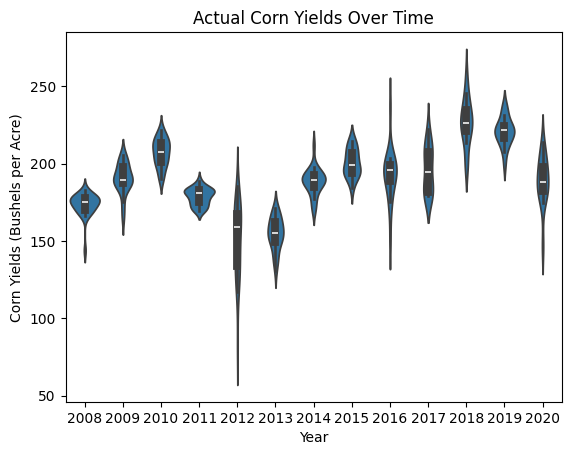

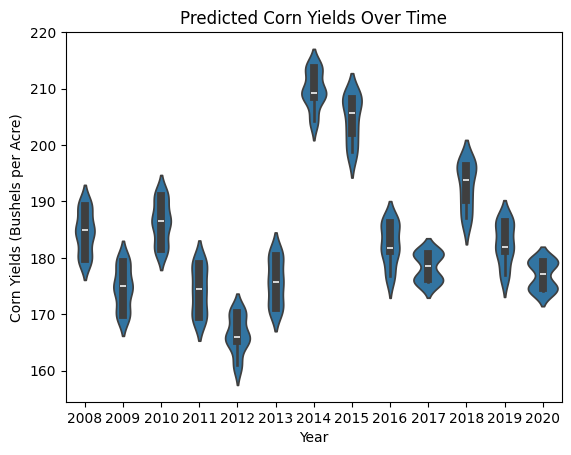

In [75]:
#Graphing fit of model on test data
#Actual yields violinplot
actual_plot = sns.violinplot(x=test_year, y=test_yields)
actual_plot.set(xlabel ="Year", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Actual Corn Yields Over Time")
plt.show()

#Prediction plot
fit_plot = sns.violinplot(x=test_year, y=model.predict(test_features))
fit_plot.set(xlabel ="Year", ylabel = "Corn Yields (Bushels per Acre)", 
              title ="Predicted Corn Yields Over Time")
plt.show()

### *What does this mean?*

Even with having picked a fairly high degree polynomial with low loss on cross validation for our regression, all of our metrics still point to our model being insufficient. Our negative R^2 value indicates our model's inputs do a terrible job capturing the variance of yields, our mean squared error is noticeably high, and a visual look at our predictions for yields on the test data vs. the actual yields for the test data shows a clear disparity.

So what does this mean for our conclusions? How do methodology decisions like tilling method and crop rotation promoted for their sustainability affect yields? Well, if a model built on using those factors as inputs struggles to predict yields, that would imply to us that these are not very important factors in the yields of a corn crop. Such a conclusion is in line with what we saw in exploratory analysis, that corn yields for our dataset seemed to vary little with different tilling methods, growing systems, stover harvest levels, or crop rotations. Looking at our model's weights this is affirmed even more, with all of the weights being extremely low. Given the scale of our inputs, with only temperature and especially seasonal rainfall exceeding the ones place in value, we can conclude that most of the fitting that our model does do is resulting from fitting on the temperature and rainfall data, as our categorical values are being minimized so much in impact as to be irrelevant.

All of this leads us to the conclusion that the growing practices we looked at have a negligible effect on corn yields, aligning with our starting hypothesis (given the nature of our original hypothesis, this can be viewed as a rejection of the null). While this may seem a disappointing result, as there is no model for making predictions resulting from it, it is still an informative conclusion.

**More Information on Null Hypotheses:** https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://statisticsbyjim.com/hypothesis-testing/null-hypothesis/&ved=2ahUKEwjymZb-rJeGAxUfkYkEHc75AvMQFnoECBsQAQ&usg=AOvVaw1D2SsxuQIC8wXSiT62s1up

## **Analysis and Conclusions**

The purpose of this project was to determine the effect that sustainable farming practices, particularly no-till, crop rotations, low stover harvest and non-continuous corn have on corn yields. Our finding was that these practices matter little for corn yields, being very poor predictors of crop performance. Other commonly understood factors like rainfall, temperature, irrigation, fertilizer use, soil carbon, pest activity, weed activity, pesticide and herbicide application level, etc., would be much better proxies for corn yields.

Recommendations/Conclusions from this project for farmers and policy makers to consider then can be summarized as
 - Soil healthy sustainable practices like no-till, crop rotations, low stover harvest, and intercropping do not impose a yield cost on corn growth
 - Adoption of sustainable practices for preserving soil producitivity costs only what is necessary to establish new operating procedures (equipment and education)
 - To predict corn yields accurately, fine grain detail on the conditions of growth are needed, as generalizations based on methodology are too imprecise to be valuable

## **Additional Resources for Those Interested**

### *Growing Methods and Crop Productivity*

**Basics of Cron Growing:** https://www.canr.msu.edu/resources/how_to_grow_corn

**Guide to No-Till for Corn:** https://www.extension.purdue.edu/extmedia/ay/ay-313.pdf

**A More Extensive Economic Study of Tilling Methods for Corn**: https://extension.umn.edu/soil-management-and-health/economics-tillage

### *Data Science*

**Data Science Pipeline**: https://www.domo.com/glossary/what-is-the-data-science-pipeline

**Model Selection**: https://towardsdatascience.com/a-short-introduction-to-model-selection-bb1bb9c73376

**More Project Ideas**: https://builtin.com/data-science/data-science-projects